In [10]:
import json
import pandas as pd
import networkx as nx
from networkx.algorithms import community

In [3]:
data = json.load(open('data/starwars-episode-7-interactions.json', 'r'))

In [18]:
def get_graph(data, threshold = 1):
    "Read the network data from the json file, filter based on weight (threshold)"
    nodes = [ node['name'] for node in data["nodes"] ]
    edges = [ (nodes[link['source']], nodes[link['target']]) for link in data["links"] if link['value'] > threshold]
    G = nx.Graph()
    for edge in edges:
        G.add_edge(edge[0],edge[1])
    return G

In [5]:
net = get_graph(data)

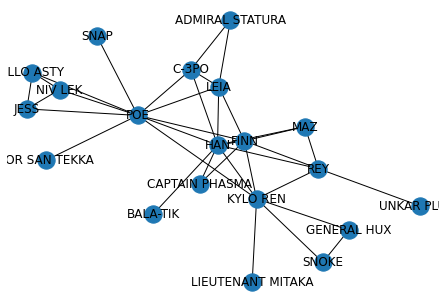

In [7]:
nx.draw(net, with_labels = True)

In [8]:
net.nodes()

NodeView(('LOR SAN TEKKA', 'POE', 'KYLO REN', 'CAPTAIN PHASMA', 'FINN', 'GENERAL HUX', 'REY', 'UNKAR PLUTT', 'LIEUTENANT MITAKA', 'HAN', 'BALA-TIK', 'SNOKE', 'MAZ', 'C-3PO', 'LEIA', 'SNAP', 'ADMIRAL STATURA', 'ELLO ASTY', 'JESS', 'NIV LEK'))

In [9]:
net.edges

EdgeView([('LOR SAN TEKKA', 'POE'), ('POE', 'KYLO REN'), ('POE', 'FINN'), ('POE', 'HAN'), ('POE', 'LEIA'), ('POE', 'SNAP'), ('POE', 'C-3PO'), ('POE', 'ELLO ASTY'), ('POE', 'NIV LEK'), ('POE', 'JESS'), ('KYLO REN', 'GENERAL HUX'), ('KYLO REN', 'LIEUTENANT MITAKA'), ('KYLO REN', 'SNOKE'), ('KYLO REN', 'REY'), ('KYLO REN', 'HAN'), ('KYLO REN', 'FINN'), ('CAPTAIN PHASMA', 'FINN'), ('CAPTAIN PHASMA', 'HAN'), ('FINN', 'REY'), ('FINN', 'HAN'), ('FINN', 'MAZ'), ('FINN', 'LEIA'), ('GENERAL HUX', 'SNOKE'), ('REY', 'UNKAR PLUTT'), ('REY', 'HAN'), ('REY', 'MAZ'), ('HAN', 'BALA-TIK'), ('HAN', 'MAZ'), ('HAN', 'C-3PO'), ('HAN', 'LEIA'), ('C-3PO', 'LEIA'), ('C-3PO', 'ADMIRAL STATURA'), ('LEIA', 'ADMIRAL STATURA'), ('ELLO ASTY', 'NIV LEK'), ('ELLO ASTY', 'JESS'), ('JESS', 'NIV LEK')])

Use community detection to uncover communities in the start wars network.
Examine and interpret the communities

- Use `greedy_modularity_communities`
- Use `k_clique_communities` with `k=3`
- Try another community detection algorithm

In [11]:
community.greedy_modularity_communities(net)

[frozenset({'BALA-TIK',
            'CAPTAIN PHASMA',
            'FINN',
            'HAN',
            'MAZ',
            'REY',
            'UNKAR PLUTT'}),
 frozenset({'ELLO ASTY', 'JESS', 'LOR SAN TEKKA', 'NIV LEK', 'POE', 'SNAP'}),
 frozenset({'GENERAL HUX', 'KYLO REN', 'LIEUTENANT MITAKA', 'SNOKE'}),
 frozenset({'ADMIRAL STATURA', 'C-3PO', 'LEIA'})]

In [17]:
list(community.k_clique_communities(net, 3))

[frozenset({'ADMIRAL STATURA',
            'C-3PO',
            'CAPTAIN PHASMA',
            'FINN',
            'HAN',
            'KYLO REN',
            'LEIA',
            'MAZ',
            'POE',
            'REY'}),
 frozenset({'ELLO ASTY', 'JESS', 'NIV LEK', 'POE'}),
 frozenset({'GENERAL HUX', 'KYLO REN', 'SNOKE'})]

In [23]:
list(community.label_propagation_communities(net))

[{'GENERAL HUX', 'KYLO REN', 'LIEUTENANT MITAKA', 'SNOKE'},
 {'ELLO ASTY', 'JESS', 'LOR SAN TEKKA', 'NIV LEK', 'POE', 'SNAP'},
 {'BALA-TIK', 'CAPTAIN PHASMA', 'FINN', 'HAN', 'MAZ', 'REY', 'UNKAR PLUTT'},
 {'ADMIRAL STATURA', 'C-3PO', 'LEIA'}]